
   <h1><center>Bank Deposit Analysis</center></h1>
   
   
   
   
   
   
   <h3><center>College of Professional Studies, Northeastern University</center></h3>
  

   <h3><center>Quyen Hoang</center></h3>
   <h3><center>Feb 14 2023</center></h3>



# Problem Statement

- To determine an efficient classification model to predict the effect of our predictor variables (durations, ages, marital status, etc. ) on our target variable which is whether a person would say yes or no to a bank deposit.  
- To identify the individual relationship between (predictor variables) and people's decisions (Yes/No) on a bank term deposit (target variable).  
    - To see if the duration of the conversation affects their decision on the deposit. If yes, what is a good duration to get them to say yes? 
    - Whether people with low balances are likely to not deposit their money. 
    - Do people who have good jobs tend to put their deposits down compared to those who have low-paid jobs? 
- Lastly, to determine what could be changed to improve the next campaign for the bank from the insights and patterns of the dataset.



# About the Dataset - Bank Marketing 
    - Data source: https://archive.ics.uci.edu/ml/machine-learning-databases/00222/
    
    - Dataset information: This datset represents the direct marketing campaigns of a Portugueses bank whose the target is to define if the client would say yes/no to a bank term deposit. 
    
    - Data dimension:  17 columns x 45,211 rows
    
    - Dataset Rationale: I have always wanted to learn more about the banking field. I came through this dataset and it immediate triggered my curisosity on how these feature have impacts on whether a person's decision on subsribing a term deposit. Next, I am a big fan of classification model and this one also gives me a chance learn more about it. Lastly, I looked further on the dataset's dimenstion and luckily it is best fit for my project. 
    - Question to investigate: First, I want to learn if the duration of the conversation affect their decision on the deposit. Secondly, if yes, what is a good duration to get them say yes. Next, I want to see whether people who have low balance are likely to not deposit their money. Lastly, do people who have a good job tend to put their deposit compare to who have low-paid job. 
    
### Attributes Information:

#### Independent attributes (predictors):

    1. Age (numeric): age of the client.
    2. Job (categorical) : type of job 
    3. Marital (categorical): marital status 
    4. Education (categorical)
    5. Default (categorical): has credit in default? 
    6. Balance: average yearly balance, in euros
    7. Housing (categorical): has housing loan? 
    8. Loan (categorical): has personal loan? 
    ###### 
    9. Contact (categorical): contact communication type 
    10. Month (categorical): last contact month of year 
    11. Day (numeric): last contact day of the week 
    12. Duration (numeric): last contact duration, in seconds (numeric)
    ###### 
    13. Campaign (numeric): number of contacts performed during this campaign and for this client
    14. Pdays (numeric): number of days that passed by after the client was last contacted from a previous campaign. (999 means client was not previously contacted)
    15. Previous (numeric): number of contacts performed before this campaign and for this client
    16. Poutcome (categorical): outcome of the previous marketing campaign 
#### Dependent attributes (desired target):
    17. Y - has the client subscribed a term deposit? (categorical:'yes','no')



### Methods

- Decision tree: it is easy to explain and interpret, the very first step to understanding Random Forest.
- Random Forest: High accuracy on a large dataset with multiple features, getting the feature importance, and handling unbalanced data well.
- Logistic model: is used when the target variable only has 2 outcome values, easy to interpret, faster to train and execute
- Dummy model: to see how good an average model is. 


# An Overview of the Dataset

In [1]:
# !pip install -U notebook-as-pdf
# !pyppeteer-install
import pandas as pd
import numpy as np
%matplotlib inline

# Importing the required packages
import numpy as np
import pandas as pd
# Data pre-processing
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree

In [2]:
df = pd.read_csv('bank/bank-full.csv', sep = ";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


The dataset has no missing values, and variables are in their suitable data types. 

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
cat_col = df.select_dtypes(exclude='number')
num_col = df.select_dtypes(include = 'number')

for i in cat_col.columns:
    print(cat_col[i].value_counts(normalize = True))
    print('------------------------')

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64
------------------------
married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64
------------------------
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64
------------------------
no     0.981973
yes    0.018027
Name: default, dtype: float64
------------------------
yes    0.555838
no     0.444162
Name: housing, dtype: float64
------------------------
no     0.839774
yes    0.160226
Name: loan, dtype: float64
------------------------
cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64
--------------------

# Data Exploratory

## Categorical data

In [7]:
## Poutcome, previous, pdays
df = df.drop(['poutcome','previous','pdays'], axis = 1)

There are four columns has 'unknown' values:
- Poutcome:'unknown' makes up 81% the data so I am going to drop this column
- Job and education: 'unknown' makes up only 0.6% and 4,1% respectively of the data so I am going to replace them by their mode (since this is categorical data) 
- Contact: 'unknown' makes up 28% of the dataset, I am also going to replace them by their mode.


In [8]:
## Handling unknown values
## Job, education, contact
df['job'] = df['job'].replace(['unknown'], df['job'].mode()[0])
df['education'] = df['education'].replace(['unknown'], df['education'].mode()[0])
df['contact'] = df['contact'].replace(['unknown'], df['contact'].mode()[0])
df.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,no


In [9]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [10]:
#df['y'] = np.where(df['y'] == 'yes',1,0)
df['month'] = df['month'].replace(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'],[5,6,7,8,10,11,12,1,2,3,4,9])

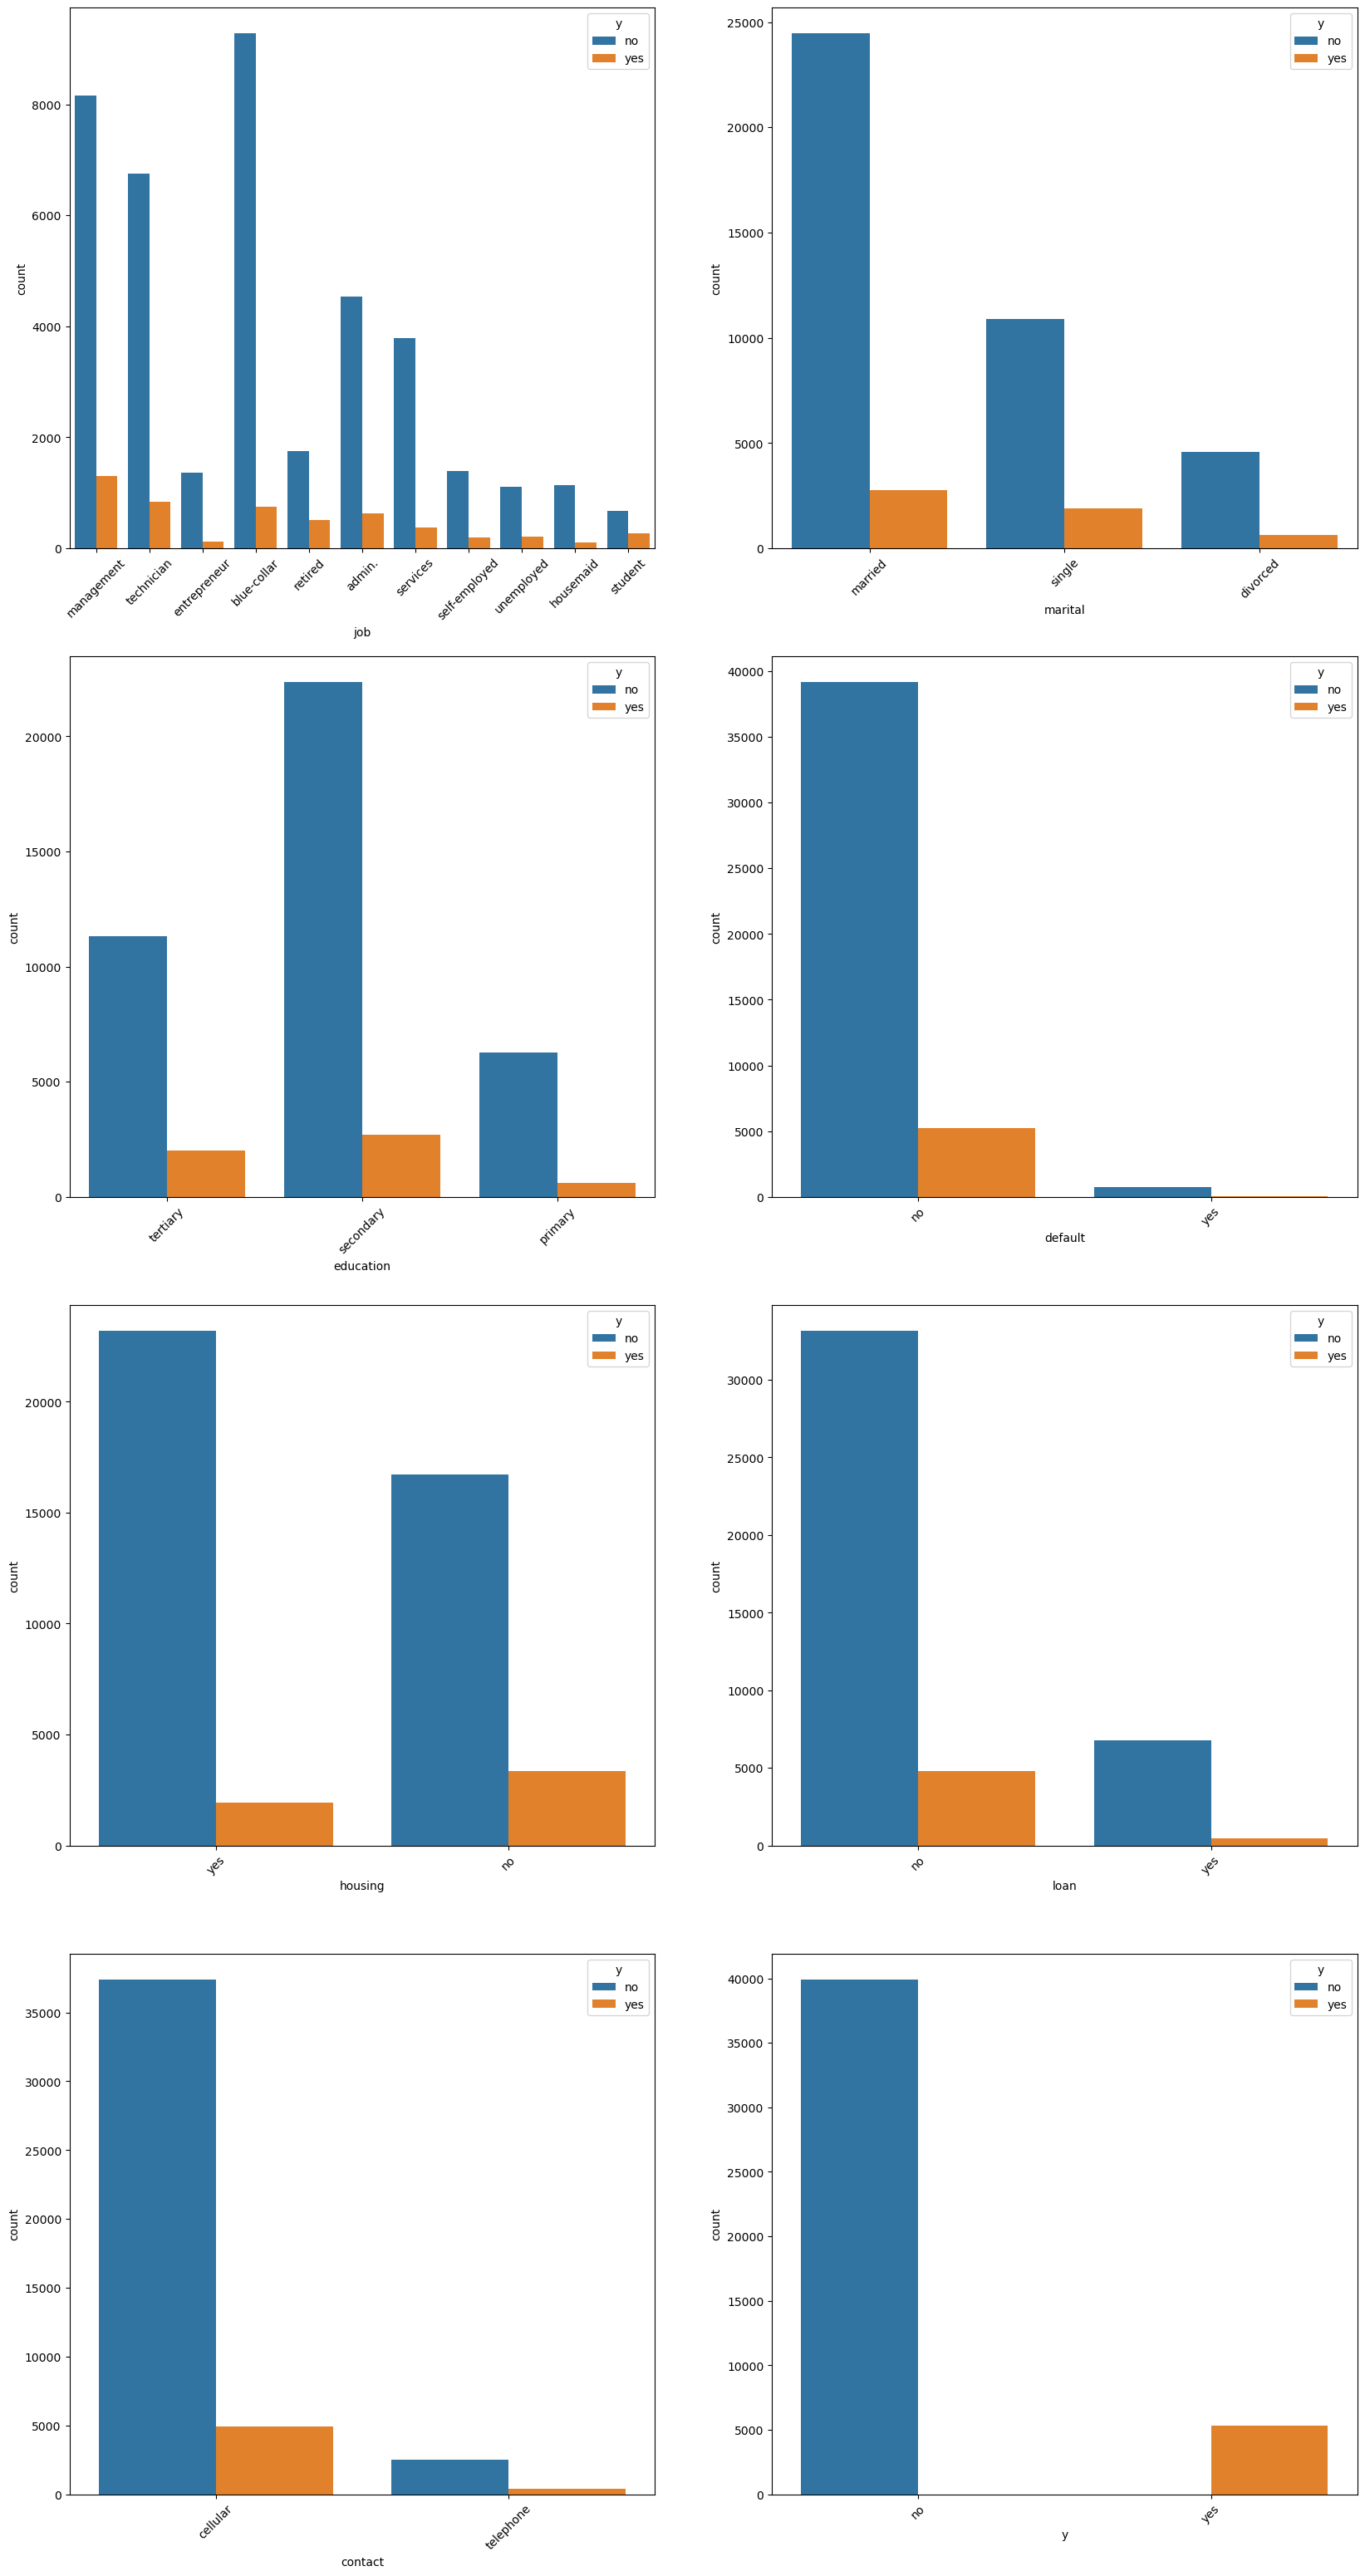

In [11]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
cat_col = df.select_dtypes(exclude='number')
num_col = df.select_dtypes(include = 'number')
colors = ["#69b3a2", "#4374B3"]

warnings.filterwarnings('ignore')
plt.figure(figsize=(20,120))
for i in enumerate(cat_col.columns):
    plt.subplot(12,2,i[0]+1)
    sns.countplot(i[1], data=df, hue='y')
    plt.xticks(rotation=45)

- There no significant pattern between independent and dependent variables. 
- y(yes/no): the data is unbalanced. The number of ‘No’ is around 10 times larger than the number of yes. It might cause problems with model prediction later.

## Numeric variables

- Previous: has more than 75% data is '0'
- Pdays: 81% of the data value are '-1' which does not make sense to me so I am going to drop this column. 

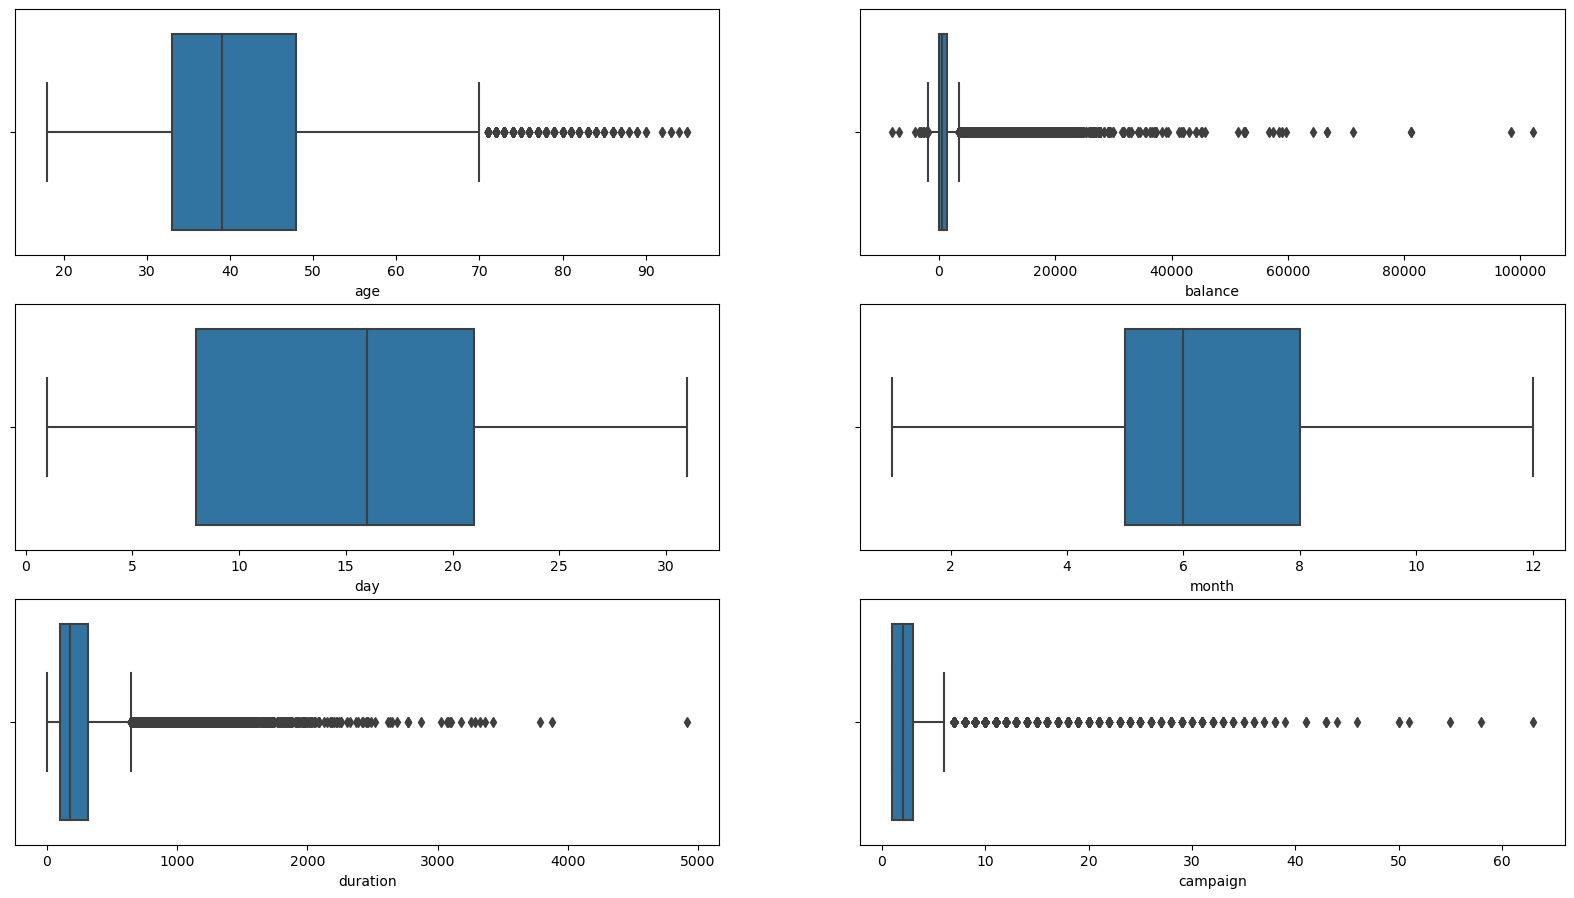

In [12]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,30),dpi=100)
num_col = df.select_dtypes(include = 'number')
for i in enumerate(num_col.columns):
    plt.subplot(8,2,i[0]+1)
    sns.boxplot(i[1], data=df)

- Age: the ages of people gather around 40 years old.
- Day: the time they contact target customers is mostly around the middle of the month (15th) 
- There are outliers in age, balance, duration, and campaign. I am going to define the functions to delete all the outliers using the interquartile method. 


In [13]:
for col in num_col.columns:
    print(f'Median of {col} is :{df[col].median()}')

Median of age is :39.0
Median of balance is :448.0
Median of day is :16.0
Median of month is :6.0
Median of duration is :180.0
Median of campaign is :2.0


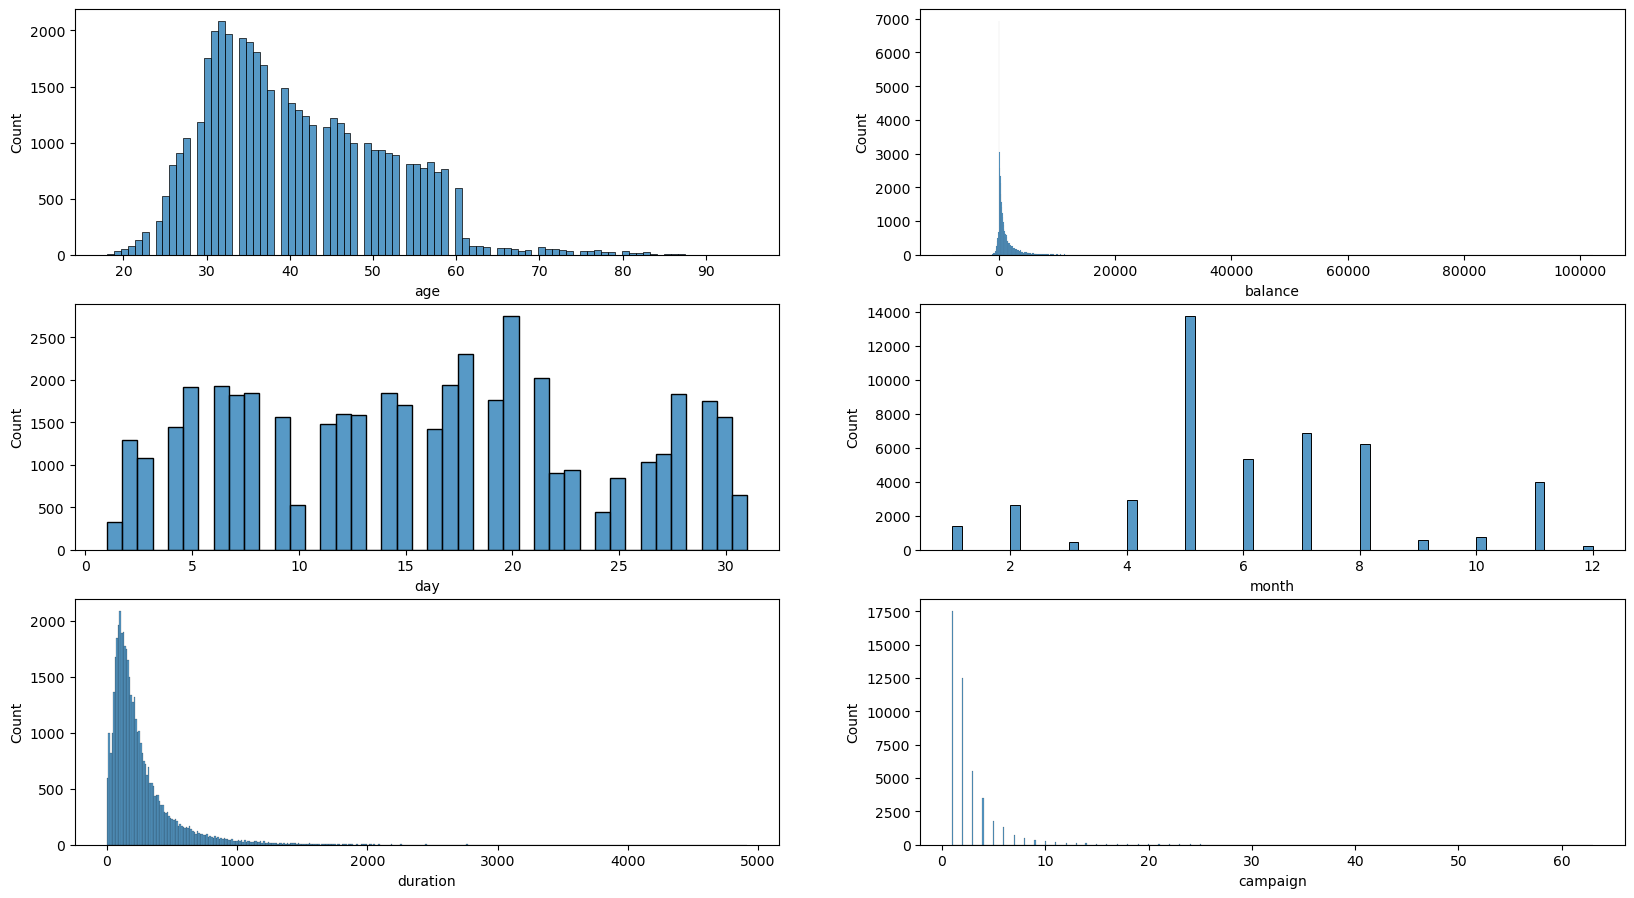

In [14]:
plt.figure(figsize=(20,30),dpi=100)
for i in enumerate(num_col.columns):
    plt.subplot(8,2,i[0]+1)
    sns.histplot(x = i[1], data=df)

### Outliers

In [15]:
def determine_outlier_thresholds_iqr(dataframe, col_name, th1=0.25, th3=0.75):
    quartile1 = dataframe[col_name].quantile(th1)
    quartile3 = dataframe[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    return lower_limit, upper_limit

In [16]:
determine_outlier_thresholds_iqr(df, 'balance', th1=0.25, th3=0.75)

(-1962.0, 3462.0)

In [17]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = determine_outlier_thresholds_iqr(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
for col in num_col:
    print(col, check_outlier(df, col))

age True
balance True
day False
month False
duration True
campaign True


#### Campaign

<AxesSubplot:xlabel='campaign'>

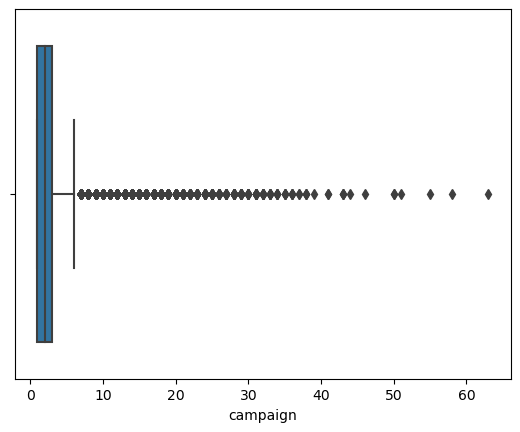

In [18]:
sns.boxplot(df['campaign'])

In [19]:
df[df['campaign']>10]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
2251,40,technician,married,secondary,no,2576,yes,yes,cellular,12,5,10,11,no
2305,25,admin.,single,secondary,no,1,yes,yes,cellular,12,5,24,12,no
2626,31,technician,married,secondary,no,106,yes,no,cellular,13,5,101,13,no
2664,40,blue-collar,married,secondary,no,598,yes,no,cellular,13,5,69,11,no
2665,42,blue-collar,divorced,secondary,no,-135,yes,no,cellular,13,5,15,11,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44100,70,retired,divorced,secondary,no,4572,no,no,cellular,8,7,173,11,no
44231,32,entrepreneur,married,tertiary,no,762,no,no,cellular,19,7,187,11,yes
44583,24,student,single,secondary,no,431,no,no,cellular,19,8,418,11,yes
44594,34,technician,single,tertiary,no,2481,no,no,cellular,23,8,220,16,no


- Campaign column is showing the number of contacts for a specific person for this campaign.
- The outliers are those more than 10 to 60. 
- We need to base on the context of the campaign, how many is a maximum contacts for a specific person before we give up. How many contacts are considered a waste of time? 
- In my opion, 10 times is still accetptable but 20-60 times is too much for the time, money, and effort of the campaign staffs. 

#### Age

<AxesSubplot:xlabel='age'>

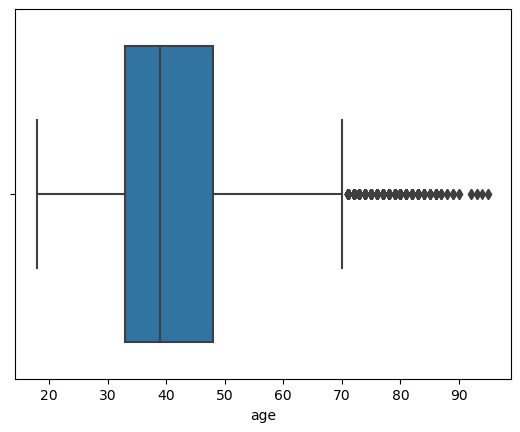

In [20]:
sns.boxplot(df['age'])

In [21]:
df[df['age']>70]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
29158,83,retired,married,primary,no,425,no,no,telephone,2,2,912,1,no
29261,75,retired,divorced,primary,no,46,no,no,cellular,2,2,294,1,no
29263,75,retired,married,primary,no,3324,no,no,cellular,2,2,149,1,no
29322,83,retired,married,tertiary,no,6236,no,no,cellular,2,2,283,2,no
29865,75,retired,divorced,primary,no,3881,yes,no,cellular,4,2,136,3,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45163,71,retired,married,secondary,no,2064,no,no,cellular,9,11,379,2,no
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,11,262,1,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,11,300,1,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,11,456,2,yes


- Outliers are those people whose ages larger than 70 to 95. These values are natural variations of the dataset so I am going to keep them.  

#### Duration

<AxesSubplot:xlabel='duration'>

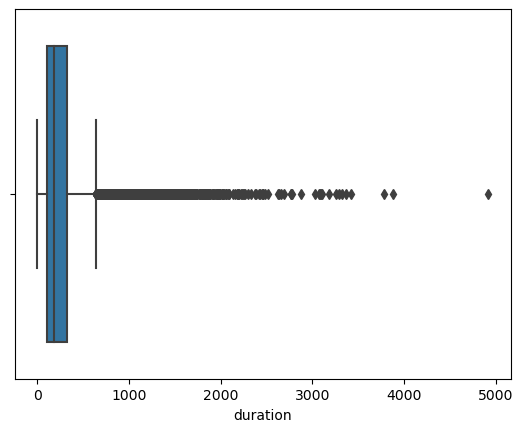

In [22]:
sns.boxplot(df['duration'])

In [23]:
df[df['duration']>1200]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
37,53,technician,married,secondary,no,-3,no,no,cellular,5,5,1666,1,no
43,54,retired,married,secondary,no,529,yes,no,cellular,5,5,1492,1,no
59,46,services,married,primary,no,179,yes,no,cellular,5,5,1778,1,no
86,56,admin.,married,secondary,no,45,no,no,cellular,5,5,1467,1,yes
87,41,technician,married,secondary,no,1270,yes,no,cellular,5,5,1389,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44824,28,admin.,single,secondary,no,127,no,no,cellular,16,9,1334,2,yes
44898,24,management,single,tertiary,no,393,no,no,cellular,27,9,1298,1,yes
44941,34,management,single,tertiary,no,549,no,no,cellular,6,10,1246,2,yes
45016,40,management,married,tertiary,no,0,no,no,cellular,14,10,1410,3,no


- There are outliers of conversation lasts more than around 1000 second ~ 17 minutes. 
- The fact that when we receive advertisement phone call most of us gonna end up hang up after 1-2 minutes to hang up - after we know the object and say that we are not interested in. That is why the data mostly gather around 180s and conversations longer than 600s are categorized as outliers. 
- Those conversations were happening over the phone not in person so in my opinion around 30 minutes to 1 hour are still accetpatble for those who are interested in the topic. 
- I am going to remove all the outliers using interquartile.  



#### Balance

In [24]:
 df[df['balance']>50000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
920,44,admin.,married,secondary,no,58544,yes,no,cellular,7,5,144,2,no
3197,43,admin.,single,secondary,no,56831,no,no,cellular,15,5,243,1,no
9536,58,entrepreneur,married,primary,no,52499,no,no,cellular,6,6,198,2,no
12926,56,blue-collar,married,secondary,no,58932,no,no,telephone,7,7,339,2,no
13154,56,entrepreneur,married,tertiary,no,51439,no,yes,cellular,8,7,325,1,no
19420,59,admin.,married,secondary,no,64343,no,no,cellular,6,8,45,4,no
19785,56,management,divorced,tertiary,no,66721,no,no,cellular,8,8,442,2,no
21192,52,blue-collar,married,primary,no,66653,no,no,cellular,14,8,109,3,no
22091,40,management,married,tertiary,no,52527,no,no,cellular,21,8,140,11,no
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,11,145,5,no


The mean of balance is around 1400 euros while there are outliers at 80,000 - 100,000 euros 

In [25]:
#df.drop(df[df['balance'] >= 50000].index, inplace = True)

#### Delete outliers

In [26]:

def remove_outlier(dataframe, col_name):
    low_limit, up_limit = determine_outlier_thresholds_iqr(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [27]:
for col in (['balance','duration','campaign']):
    df = remove_outlier(df, col)

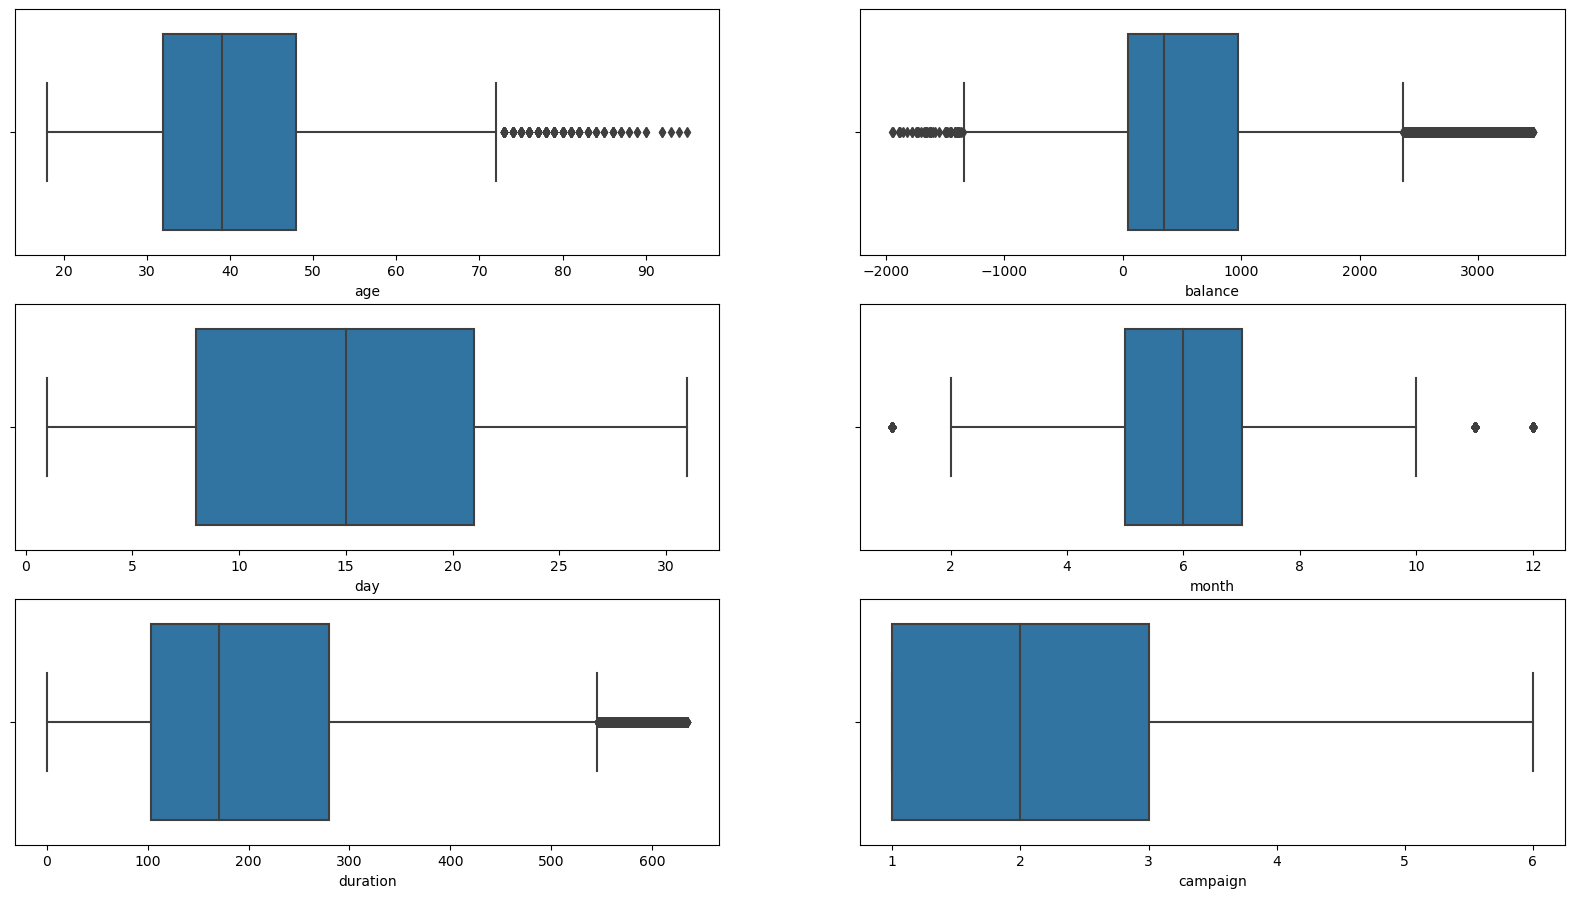

In [28]:
plt.figure(figsize=(20,30),dpi=100)
for i in enumerate(num_col.columns):
    plt.subplot(8,2,i[0]+1)
    sns.boxplot(x = i[1], data=df)

### Correlation

<Figure size 2000x12000 with 0 Axes>

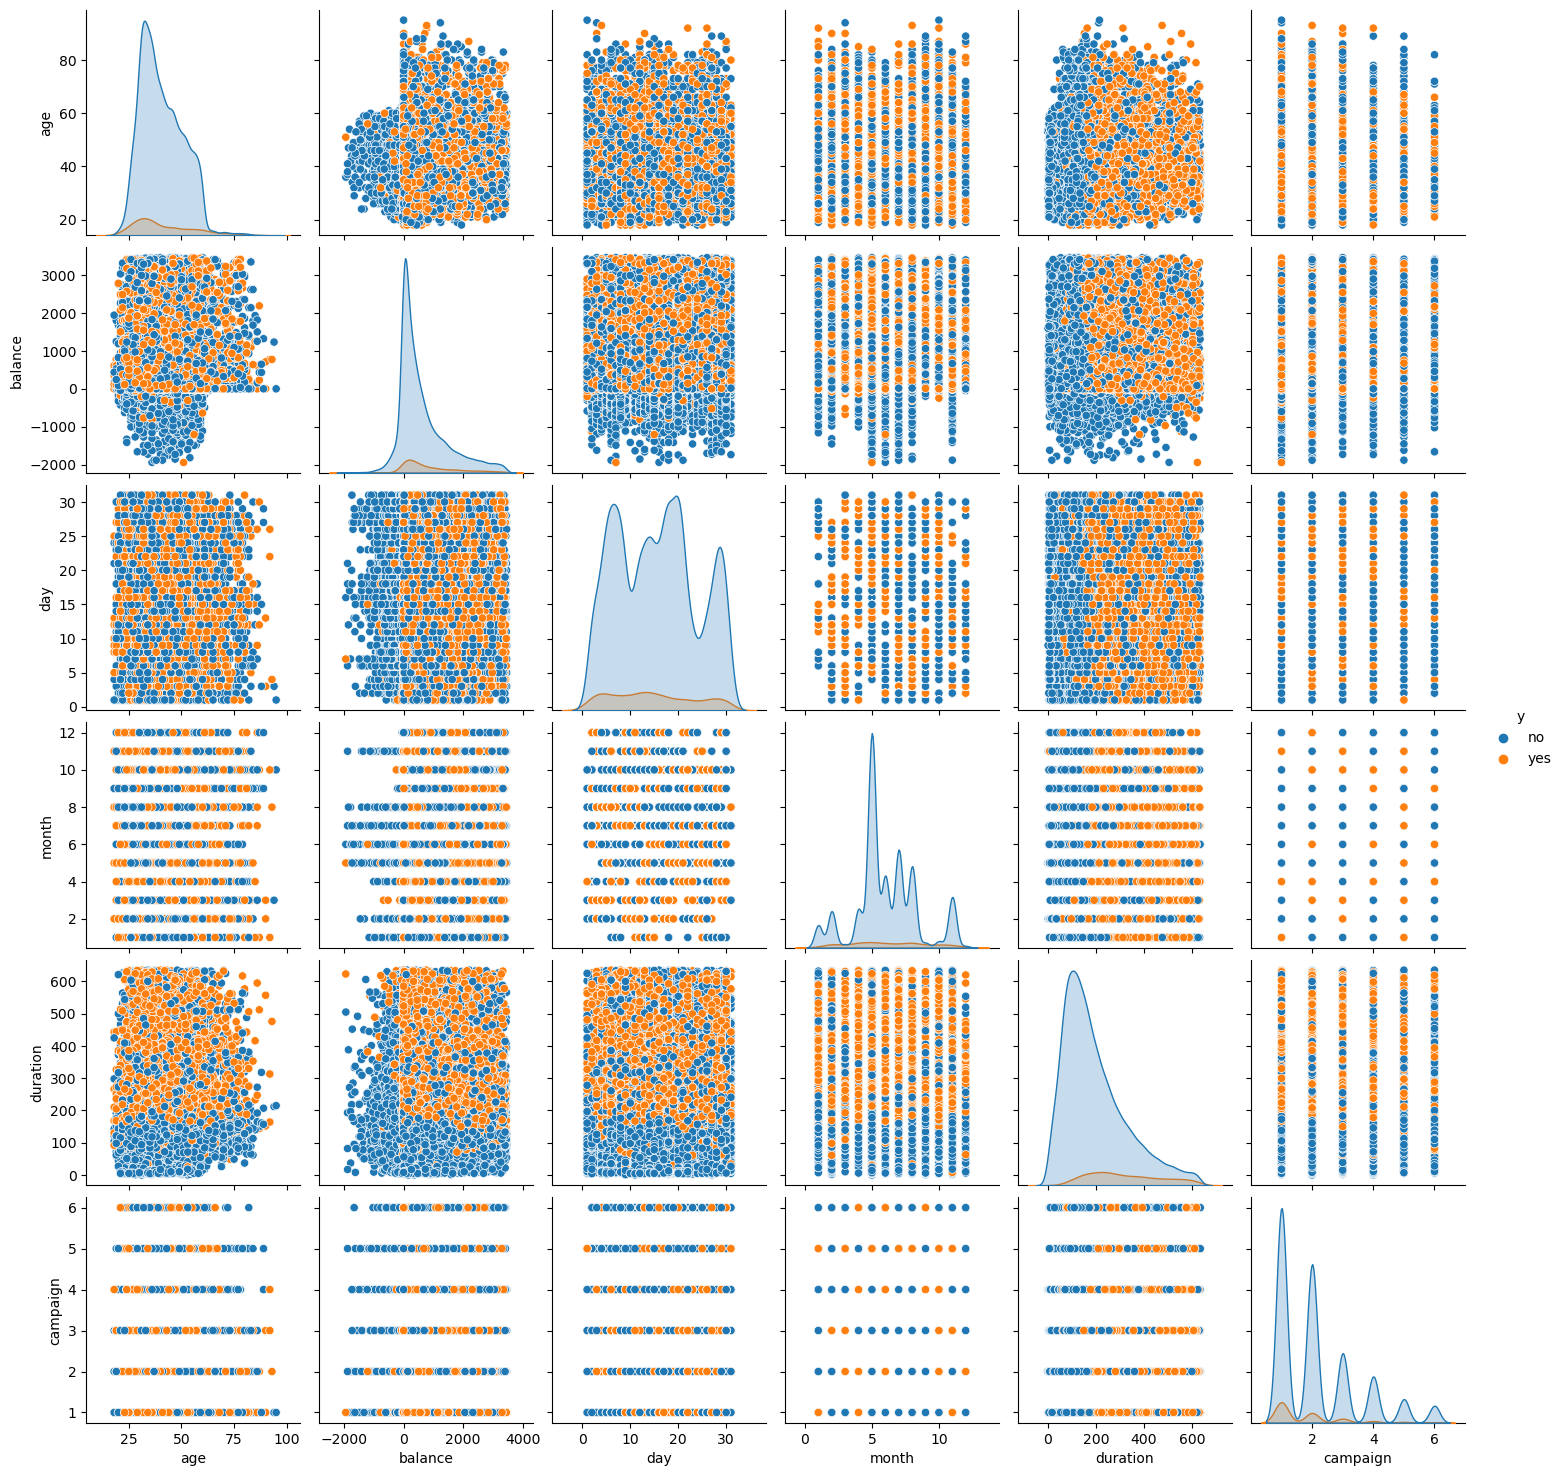

<Figure size 2000x12000 with 0 Axes>

In [29]:
sns.pairplot(data=df, hue = 'y')
plt.figure(figsize=(20,120))

    - There are some distinct sections by y(yes/no) in the scatter plots of duration. This variable might have an impact on our target variable - y(yes/no). We also see that in balance and day variables. 

In [30]:
## Data Transfromation
df['education'] = LabelEncoder().fit_transform(df['education'])
DF = pd.get_dummies(data= df, columns = ['job', 'marital', 'default', 'housing', 'loan', 'contact','y'], drop_first = True)


In [31]:
DF.corr()

,age,education,balance,day,month,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,...,job_student,job_technician,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,y_yes
age,1.000000,-0.167853,0.095546,-0.008361,0.089263,-0.024383,0.032009,-0.030121,0.018151,0.090495,...,-0.203361,-0.057206,-0.001250,0.284013,-0.431657,-0.017707,-0.174494,-0.005913,0.160906,0.024452
education,-0.167853,1.000000,0.043737,0.024471,0.068604,-0.000200,-0.004603,-0.410113,0.059541,-0.130985,...,0.012367,0.067612,-0.026807,-0.147022,0.162939,-0.011929,-0.077343,-0.019758,-0.073470,0.081938
balance,0.095546,0.043737,1.000000,0.006524,0.056900,0.024622,-0.025112,-0.025461,-0.006327,-0.002278,...,0.014246,-0.014771,0.008771,0.027752,-0.009175,-0.129462,-0.066188,-0.095398,0.045734,0.097228
day,-0.008361,0.024471,0.006524,1.000000,0.074217,-0.035939,0.103076,-0.021086,0.001951,0.003360,...,-0.012577,0.030133,-0.002634,0.002103,-0.004352,0.007656,-0.024609,0.008955,0.016744,-0.029610
month,0.089263,0.068604,0.056900,0.074217,1.000000,-0.030810,0.050346,-0.082721,0.029846,0.034813,...,-0.008212,0.038813,-0.032526,0.058928,-0.065422,0.021271,-0.176555,0.030017,0.035350,0.028114
duration,-0.024383,-0.000200,0.024622,-0.035939,-0.030810,1.000000,-0.075139,0.011645,0.005895,-0.016079,...,0.002380,-0.006449,0.009856,-0.021130,0.023570,-0.001409,0.000051,-0.009252,-0.048588,0.258314
campaign,0.032009,-0.004603,-0.025112,0.103076,0.050346,-0.075139,1.000000,0.012747,0.005616,0.013928,...,-0.021414,0.019020,-0.014809,0.051583,-0.047892,0.011495,-0.034131,-0.001426,0.056274,-0.082015
job_blue-collar,-0.030121,-0.410113,-0.025461,-0.021086,-0.082721,0.011645,0.012747,1.000000,-0.099284,-0.089924,...,-0.080576,-0.242799,-0.091767,0.131675,-0.095246,0.011153,0.166325,0.006026,0.007366,-0.083600
job_entrepreneur,0.018151,0.059541,-0.006327,0.001951,0.029846,0.005895,0.005616,-0.099284,1.000000,-0.030634,...,-0.027450,-0.082714,-0.031262,0.039620,-0.046743,0.022048,0.011056,0.034859,-0.009126,-0.024874
job_housemaid,0.090495,-0.130985,-0.002278,0.003360,0.034813,-0.016079,0.013928,-0.089924,-0.030634,1.000000,...,-0.024862,-0.074916,-0.028315,0.049756,-0.062622,-0.000320,-0.084615,-0.017796,0.048282,-0.012071


In [32]:
DF.shape

(34967, 24)

In [33]:
DF['y_yes'].value_counts()

0    31960
1     3007
Name: y_yes, dtype: int64

In [34]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif_data = pd.DataFrame()
# vif_data["feature"] = X_train.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
#                           for i in range(len((X_train.columns)))]
# vif_data

## Building models


### Decision Tree 

In [35]:
X = DF.drop('y_yes', axis = 1)
y = DF['y_yes']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 100)
print(f'Dimension of X test is : {X_test.shape}')
print(f'Dimension of X train is : {X_train.shape}')

Dimension of X test is : (10491, 23)
Dimension of X train is : (24476, 23)


In [36]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="gini")
dtree = dtree.fit(X_train, y_train)


In [37]:
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)
print(f'Accuracy score on test set is: {accuracy_score(y_test, y_test_pred)}')
print(f'Accuracy score on train set is: {accuracy_score(y_train, y_train_pred)}')

Accuracy score on test set is: 0.892765227337718
Accuracy score on train set is: 1.0


[[8999  610]
 [ 515  367]]


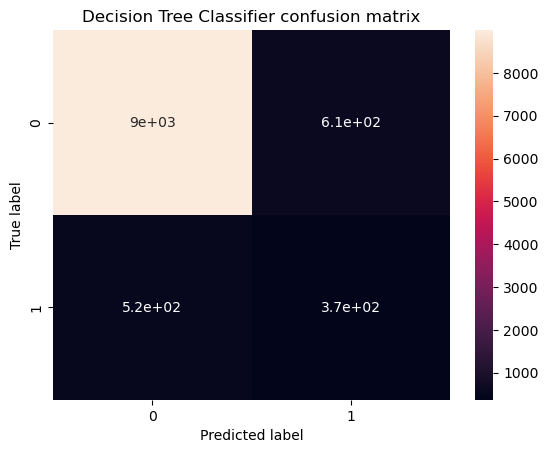

In [38]:
cfm = confusion_matrix(y_test, y_test_pred)
print(cfm)
sns.heatmap(cfm, annot = True) 
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [39]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9609
           1       0.38      0.42      0.39       882

    accuracy                           0.89     10491
   macro avg       0.66      0.68      0.67     10491
weighted avg       0.90      0.89      0.90     10491



- The precision and recall of no (0) are pretty good: 
    - Precision: 94% - Out of the number of data that were predicted 0, 92% of them are actually 0 
    - Recall: 94% - Out of the total data that are atual 0, 92% of them were predicted correctly. 
- The precision and recall of no (0) are lower than those of yes (1):  
    - Precision: 37% - Out of the amount of data that were predicted 0, 41% of them are actually 0 
    - Recall: 40% - Out of the total data that are 0, 42% of them were predicted correctly. 


In [40]:
# plt.figure(figsize = (20,16))
# tree.plot_tree(clf, fontsize = 16,rounded = True , filled = True);

In [41]:
from sklearn import metrics
dt_auc = metrics.roc_auc_score(y_test, y_test_pred)
dt_auc

0.6763088105468017

AUC is the metric showing how good model is capable of dishtinguish 2 classes. The more it gets closer to 1 the better. 

    - I chose the decision tree model because it has higher positive recall: I think that correctly predict people who would say no to the deposit is more important than correctly predicted people who would say yes. 

    - High positive recall: when the model predicts that the people say no, they must say no. This model gonna reduce the number of people that are actual YES but were predicted NO. (This model reduces the false Negative). In that case, they would not miss a lot of cases that are yes.

    - This model might misclassify some actual NO as Yes. 
    - How many of misclassified data points is good will be identified by the threshold. 
    - The threshold depends on the business people to define. 

### Random forest

In [42]:
## Fit the model
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 300, random_state = 100)
rf = rf.fit(X_train, y_train)

In [43]:
## Predict on test and train sets. 
rf_y_test_pred = rf.predict(X_test)
rf_y_train_pred = rf.predict(X_train)

print(f'The accuracy score of train and test are: {accuracy_score(y_train, rf_y_train_pred)} and {accuracy_score(y_test, rf_y_test_pred)} respectively')

The accuracy score of train and test are: 1.0 and 0.9202173291392622 respectively


[[9493  116]
 [ 721  161]]


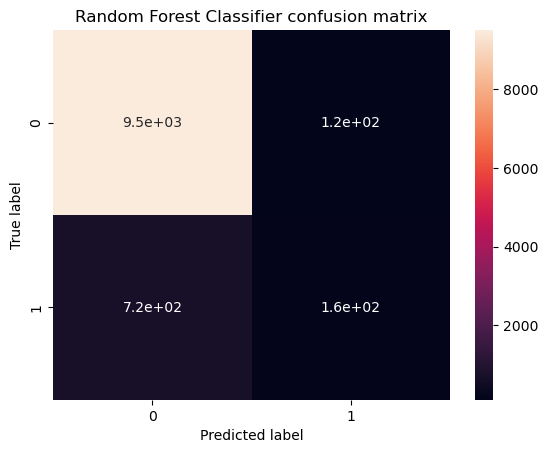

In [44]:
## Confusion matrix
cfm = confusion_matrix(y_test, rf_y_test_pred)
print(cfm)
sns.heatmap(cfm, annot = True) 
plt.title('Random Forest Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [82]:
#classification_report into dataframe
# a= classification_report(y_test, rf_y_test_pred,output_dict=True)
# import pandas
# df = pandas.DataFrame(a).transpose()
# df

,precision,recall,f1-score,support
0,0.929411,0.987928,0.957776,9609.000000
1,0.581227,0.182540,0.277826,882.000000
accuracy,0.920217,0.920217,0.920217,0.920217
macro avg,0.755319,0.585234,0.617801,10491.000000
weighted avg,0.900138,0.920217,0.900611,10491.000000


In [81]:
## Classification report
print(classification_report(y_test, rf_y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      9609
           1       0.58      0.18      0.28       882

    accuracy                           0.92     10491
   macro avg       0.76      0.59      0.62     10491
weighted avg       0.90      0.92      0.90     10491



    - The precision and recall figures of class 0 are still pretty good at 93% and 99% respectively.
    - The Precision value of class 1 in this model improved significantly to 58% while the recall one got decreased a bit to 18%. 


In [46]:
## AUC score
rf_auc = metrics.roc_auc_score(y_test, rf_y_test_pred)
rf_auc

0.5852338333605895

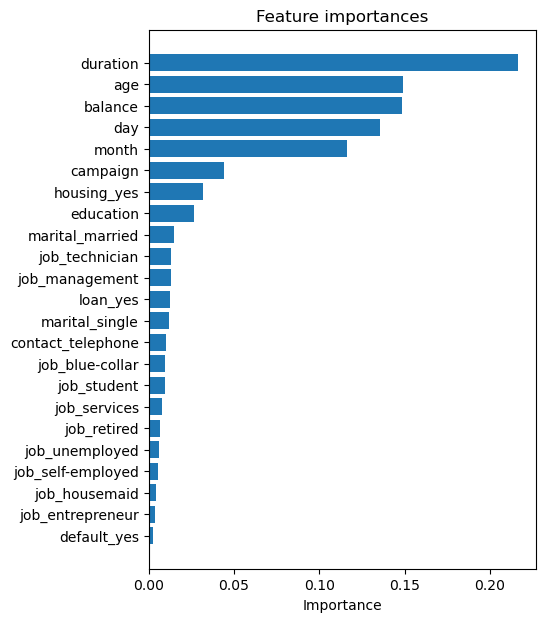

In [47]:
## Feature importance
import pandas as pd
#feature_imp = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
features_list = X.columns.values
feature_imp = rf.feature_importances_
sorted_idx = np.argsort(feature_imp)



sorted_idx = np.argsort(feature_imp)
plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_imp[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

## Logistic

In [48]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state = 100)
lg = lg.fit(X_train, y_train)


In [49]:
lg_y_test_pred = lg.predict(X_test)
lg_y_train_pred = lg.predict(X_train)
print(f'The accuracy score of train and test are: {accuracy_score(y_train, lg_y_train_pred)} and {accuracy_score(y_test, lg_y_test_pred)} respectively')

The accuracy score of train and test are: 0.9123631312305932 and 0.9152606996473167 respectively


In [50]:
cfm = confusion_matrix(y_test, lg_y_test_pred)
cfm

array([[9557,   52],
       [ 837,   45]])

In [51]:
print(classification_report(y_test, lg_y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      9609
           1       0.46      0.05      0.09       882

    accuracy                           0.92     10491
   macro avg       0.69      0.52      0.52     10491
weighted avg       0.88      0.92      0.88     10491



This model is only able to catch 5% of the total yes which is showing that it is not a good model to use. 

In [52]:
lg_auc = metrics.roc_auc_score(y_test, lg_y_test_pred)
lg_auc

0.5228044074326578

## KNN

In [53]:
## Building model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn = knn.fit(X_train, y_train)

In [54]:
## Predict on test and train 
knn_y_test_pred = knn.predict(X_test)
knn_y_train_pred = knn.predict(X_train)
print(f'The accuracy score of train and test are: {accuracy_score(y_train, knn_y_train_pred)} and {accuracy_score(y_test, knn_y_test_pred)} respectively')

The accuracy score of train and test are: 0.9157950645530315 and 0.9154513392431608 respectively


In [55]:
## Classification report
print(classification_report(y_test, knn_y_test_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9609
           1       0.46      0.03      0.06       882

    accuracy                           0.92     10491
   macro avg       0.69      0.51      0.51     10491
weighted avg       0.88      0.92      0.88     10491



In [56]:
## Auc score
knn_auc = metrics.roc_auc_score(y_test, knn_y_test_pred)
knn_auc

0.5136410168188412

### Dummy Model

In [69]:
## Building model
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")

dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [70]:
## Predict on test and train
dm_y_train_pred = dummy_clf.predict(X_train)
dm_y_test_pred = dummy_clf.predict(X_test)

print(f'The accuracy score of train and test are: {accuracy_score(y_train,dm_y_train_pred)} and {accuracy_score(y_test, dm_y_test_pred)}')

The accuracy score of train and test are: 0.9131802582121261 and 0.915927938232771


In [71]:
## Classification report
print(classification_report(y_test, dm_y_test_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9609
           1       0.00      0.00      0.00       882

    accuracy                           0.92     10491
   macro avg       0.46      0.50      0.48     10491
weighted avg       0.84      0.92      0.88     10491



In [72]:
## Auc score
dm_auc = metrics.roc_auc_score(y_test, dm_y_test_pred)
dm_auc

0.5


AUC is the ability to differenciate class 0 and class 1 of the model. How good the model is capable at distinguishing between classes. 
Auc = 0.5 mean no segregation. the model is worthles because it is no better than a random guessing. 

## Imbalanced problem

In [61]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=100)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote.value_counts()

0    22351
1    22351
Name: y_yes, dtype: int64

## Conclusion

1. Decision tree is my model to use because of its high positive recall value. Test and train accuracy are 86% and 100% respectively. 
2. Duration has the highest correlation with target variable. 
3. Imbalanced data set might be the reason why we got low value of recall metric for class 1. More researches need to be done before jumping into any conclusion. 


<h1><center>References</center></h1>

    - Yıldırım, Soner. (Feb 12, 2020). Handling Missing Values with Pandas. Medium. Retrieved Feb 5, 2023, from https://towardsdatascience.com/handling-missing-values-with-pandas-b876bf6f008f 
Szabo, Bibor. (Mar 23, 2020).  

    - How to Create a Seaborn Correlation Heatmap in Python?. Medium. Retrieved Feb 5, 2023, from https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e 
    
    
    - Will Koehrsen. (Dec 27, 2017). Random Forest in Python. Towarddatascience. Retrieved Feb 5, 2023, from https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 
